In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from importlib import reload
import warnings
import video as v

In [2]:
warnings.simplefilter("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [3]:
reload(v)
vid,fps = v.get_video('videos/constant/Banned Pokemon Seizure Scene.mp4')
fps

30

In [4]:
frames = vid.shape[0]
height = vid.shape[1]
width = vid.shape[2]
df = pd.DataFrame(vid.reshape((-1,3)))
df['frame'] = df.index // (width * height)
df['x'] = df.index % width
df['y'] = df.index // height
df = df.set_index(['frame','y','x']).rename(columns={
    0:'hue',
    1:'saturation',
    2:'value',
})

[Text(-100.0, 0, '-4.0'),
 Text(0.0, 0, '0.0'),
 Text(100.0, 0, '3.0'),
 Text(200.0, 0, '6.0'),
 Text(300.0, 0, '10.0'),
 Text(400.0, 0, '13.0'),
 Text(500.0, 0, '16.0'),
 Text(600.0, 0, '20.0'),
 Text(700.0, 0, '23.0'),
 Text(800.0, 0, '26.0'),
 Text(900.0, 0, '30.0')]

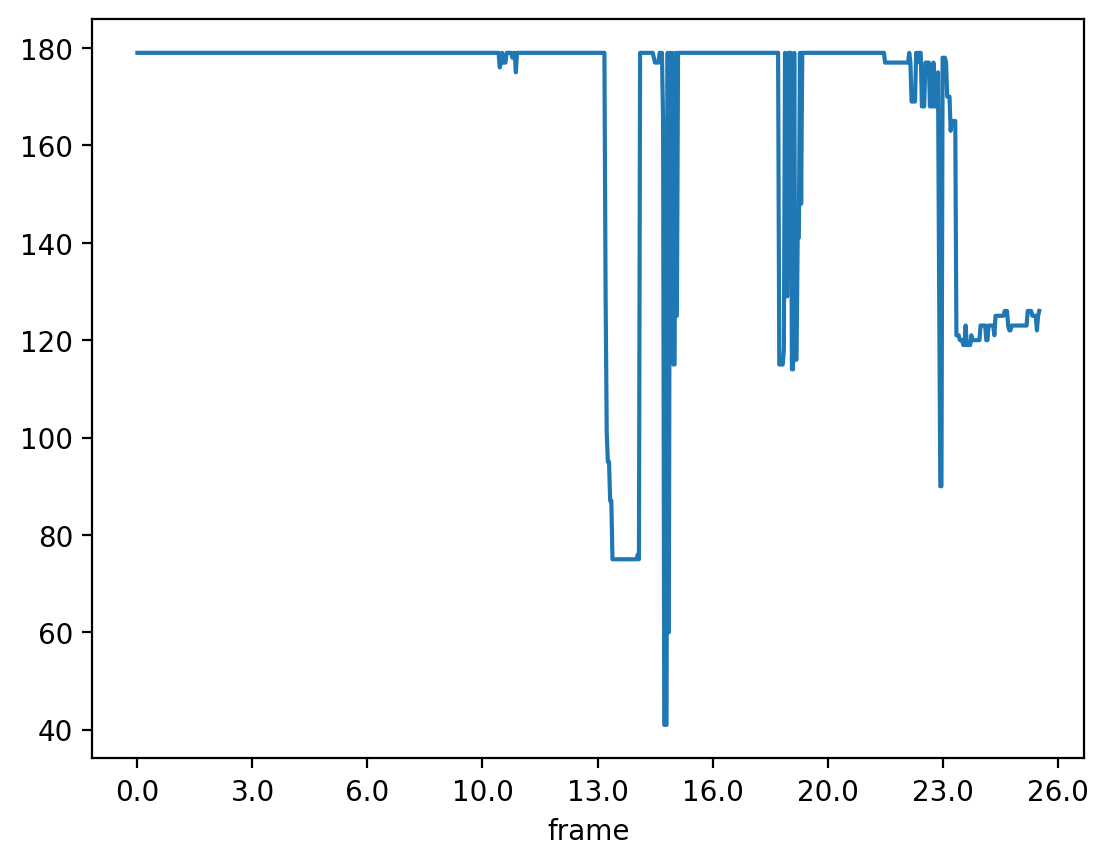

In [5]:
val = df.groupby('frame').hue.max().plot.line()
val.set_xticklabels(val.get_xticks() // fps)
